In [ ]:
import pandas as pd
import numpy as np # gpu가 더 빠르듯이 병렬적 방식을 차용하려면 행렬
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files # colab에서만 불러옴 아나콘다 다른 ide에서는 x

In [ ]:
uploaded = files.upload() # files 패키지에 있는 upload 함수를 쓸거다

Saving world_gdp_current.csv to world_gdp_current.csv


In [ ]:
df = pd.read_csv("world_gdp_current.csv")

In [ ]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.112502e+10,2.161623e+10,2.350628e+10,2.804836e+10,2.592067e+10,2.947210e+10,...,9.859870e+11,1.006530e+12,9.273480e+11,8.851760e+11,1.021040e+12,1.007200e+12,1.000830e+12,9.275930e+11,1.082000e+12,1.169480e+12
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.056449e+10,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.044764e+10,1.117321e+10,1.199053e+10,1.272769e+10,1.389811e+10,1.492979e+10,...,8.339480e+11,8.943220e+11,7.686450e+11,6.913630e+11,6.848990e+11,7.670260e+11,8.225380e+11,7.864600e+11,8.444600e+11,8.778630e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.334020e+11,1.372440e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.067140e+11


In [ ]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [ ]:
countrycode = df[['Country Name', 'Country Code']] # 2개니까 대괄호 2개

In [ ]:
#df.iloc[:, 0:2] integer location, 행은 다 쓰고 열은 0과 1만

In [ ]:
countrycode

,Country Name,Country Code
0,Aruba,ABW
1,Africa Eastern and Southern,AFE
2,Afghanistan,AFG
3,Africa Western and Central,AFW
4,Angola,AGO
...,...,...
261,Kosovo,XKX
262,"Yemen, Rep.",YEM
263,South Africa,ZAF
264,Zambia,ZMB


In [ ]:
df = df.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'])
df.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,NaN
1,Africa Eastern and Southern,2.112502e+10,2.161623e+10,2.350628e+10,2.804836e+10,2.592067e+10,2.947210e+10,3.201437e+10,3.326951e+10,3.632779e+10,...,9.859870e+11,1.006530e+12,9.273480e+11,8.851760e+11,1.021040e+12,1.007200e+12,1.000830e+12,9.275930e+11,1.082000e+12,1.169480e+12
2,Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,...,2.056449e+10,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,NaN
3,Africa Western and Central,1.044764e+10,1.117321e+10,1.199053e+10,1.272769e+10,1.389811e+10,1.492979e+10,1.591084e+10,1.451058e+10,1.496824e+10,...,8.339480e+11,8.943220e+11,7.686450e+11,6.913630e+11,6.848990e+11,7.670260e+11,8.225380e+11,7.864600e+11,8.444600e+11,8.778630e+11
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.334020e+11,1.372440e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.067140e+11


## Merge Method : practice

In [ ]:
import random
random.seed(10)

data = pd.DataFrame({

    'Name' : ['Ann', 'Bob', 'Candy', 'Daniel', 'Edgar', "Farrell", 'George',  'Happy', 'Ian', 'Matthew'],

    'Team' : ['team_a', 'team_b', 'team_c']*3 +['team_a'],

    'Games' : random.sample(range(5, 34), 10),

    'January' : random.sample(range(1, 50), 10),

    'February' : random.sample(range(1, 50), 10),

    'March' : random.sample(range(1, 50), 10),

    'April' : random.sample(range(1, 50), 10),

    'May' : random.sample(range(1, 50), 10),

    'June' : random.sample(range(1, 50), 10),

    'July' : random.sample(range(1, 50), 10),

    'August' : random.sample(range(1, 50), 10),

    'September' : random.sample(range(1, 50), 10),

    'October' : random.sample(range(1, 50), 10),

    'November' : random.sample(range(1, 50), 10)

})

In [ ]:
data

,Name,Team,Games,January,February,March,April,May,June,July,August,September,October,November
0,Ann,team_a,23,42,27,44,3,21,33,43,8,44,11,1
1,Bob,team_b,6,11,9,20,38,43,11,5,7,18,43,35
2,Candy,team_c,18,3,39,43,1,36,15,35,29,10,42,46
3,Daniel,team_a,20,34,23,24,16,29,27,6,11,40,12,3
4,Edgar,team_b,33,32,25,9,9,28,16,10,13,34,46,22
5,Farrell,team_c,5,21,49,30,13,31,3,25,23,12,31,21
6,George,team_a,11,5,19,16,20,5,44,37,28,8,23,16
7,Happy,team_b,19,16,17,29,35,42,32,24,27,48,21,6
8,Ian,team_c,30,24,30,40,24,38,20,39,47,30,28,17
9,Matthew,team_a,13,47,12,25,46,49,39,45,16,20,15,29


```
df.melt(id_vars, value_vars, value_name)
```

id_vars :     
- a list of column names that remain as they are and are not reshaped

In [ ]:
data.melt(id_vars = ["Name", "Team", "Games"]) # id_vars 그대로나머지 알아서 reshape됨
# variable은 열 이름, value는 값

,Name,Team,Games,variable,value
0,Ann,team_a,23,January,42
1,Bob,team_b,6,January,11
2,Candy,team_c,18,January,3
3,Daniel,team_a,20,January,34
4,Edgar,team_b,33,January,32
...,...,...,...,...,...
105,Farrell,team_c,5,November,21
106,George,team_a,11,November,16
107,Happy,team_b,19,November,6
108,Ian,team_c,30,November,17


In [ ]:
data.melt(id_vars = ["Name", "Team", "Games"], value_vars = ["March", "April"])

,Name,Team,Games,variable,value
0,Ann,team_a,23,March,44
1,Bob,team_b,6,March,20
2,Candy,team_c,18,March,43
3,Daniel,team_a,20,March,24
4,Edgar,team_b,33,March,9
5,Farrell,team_c,5,March,30
6,George,team_a,11,March,16
7,Happy,team_b,19,March,29
8,Ian,team_c,30,March,40
9,Matthew,team_a,13,March,25


In [ ]:
data.melt(id_vars = ["Name"], value_vars = ["March", "April"], var_name = "Month", value_name= "score")

,Name,Month,score
0,Ann,March,44
1,Bob,March,20
2,Candy,March,43
3,Daniel,March,24
4,Edgar,March,9
5,Farrell,March,30
6,George,March,16
7,Happy,March,29
8,Ian,March,40
9,Matthew,March,25


In [ ]:
data.melt(id_vars = ["Name", "Team", "Games"], value_vars = ["March", "April"], var_name = "Month", value_name = "score")

,Name,Team,Games,Month,score
0,Ann,team_a,23,March,44
1,Bob,team_b,6,March,20
2,Candy,team_c,18,March,43
3,Daniel,team_a,20,March,24
4,Edgar,team_b,33,March,9
5,Farrell,team_c,5,March,30
6,George,team_a,11,March,16
7,Happy,team_b,19,March,29
8,Ian,team_c,30,March,40
9,Matthew,team_a,13,March,25


In [ ]:
df.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,NaN
1,Africa Eastern and Southern,2.112502e+10,2.161623e+10,2.350628e+10,2.804836e+10,2.592067e+10,2.947210e+10,3.201437e+10,3.326951e+10,3.632779e+10,...,9.859870e+11,1.006530e+12,9.273480e+11,8.851760e+11,1.021040e+12,1.007200e+12,1.000830e+12,9.275930e+11,1.082000e+12,1.169480e+12
2,Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,...,2.056449e+10,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,NaN
3,Africa Western and Central,1.044764e+10,1.117321e+10,1.199053e+10,1.272769e+10,1.389811e+10,1.492979e+10,1.591084e+10,1.451058e+10,1.496824e+10,...,8.339480e+11,8.943220e+11,7.686450e+11,6.913630e+11,6.848990e+11,7.670260e+11,8.225380e+11,7.864600e+11,8.444600e+11,8.778630e+11
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.334020e+11,1.372440e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.067140e+11


In [ ]:
df_new = df.melt(id_vars = ["Country Name"], var_name = "Year", value_name = "GDP") # var_name : 열 변수를 값으로 가져와서 쭉 늘어트리는 것

In [ ]:
df_new

,Country Name,Year,GDP
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,2.112502e+10
2,Afghanistan,1960,5.377778e+08
3,Africa Western and Central,1960,1.044764e+10
4,Angola,1960,NaN
...,...,...,...
16753,Kosovo,2022,9.429156e+09
16754,"Yemen, Rep.",2022,NaN
16755,South Africa,2022,4.058700e+11
16756,Zambia,2022,2.978445e+10


In [ ]:
df_new.rename(columns = {"Country Name" : "Country"}, inplace = True) # rename하기

In [ ]:
df_new

,Country,Year,GDP
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,2.112502e+10
2,Afghanistan,1960,5.377778e+08
3,Africa Western and Central,1960,1.044764e+10
4,Angola,1960,NaN
...,...,...,...
16753,Kosovo,2022,9.429156e+09
16754,"Yemen, Rep.",2022,NaN
16755,South Africa,2022,4.058700e+11
16756,Zambia,2022,2.978445e+10


In [ ]:
df_new["gdp_mil"] = df_new["GDP"].div(1000000) # 단위를 백만으로 축소한 변수를 df_new 데이터프레임에 추가
df_new

,Country,Year,GDP,gdp_mil
0,Aruba,1960,NaN,NaN
1,Africa Eastern and Southern,1960,2.112502e+10,21125.015452
2,Afghanistan,1960,5.377778e+08,537.777811
3,Africa Western and Central,1960,1.044764e+10,10447.637853
4,Angola,1960,NaN,NaN
...,...,...,...,...
16753,Kosovo,2022,9.429156e+09,9429.156202
16754,"Yemen, Rep.",2022,NaN,NaN
16755,South Africa,2022,4.058700e+11,405870.000000
16756,Zambia,2022,2.978445e+10,29784.454056


### Merge Method

In [ ]:
fruit = pd.DataFrame({"Num" : [123, 456, 789, 1011, 1112], "Fruit" : ["Apple", "Banana", "Cherry", "Lemon", "Peach"]})
grade = pd.DataFrame({"Num" : [123, 789, 1314], "Grade" : ["A", "B", "C"]})

In [ ]:
fruit

,Num,Fruit
0,123,Apple
1,456,Banana
2,789,Cherry
3,1011,Lemon
4,1112,Peach


In [ ]:
grade

,Num,Grade
0,123,A
1,789,B
2,1314,C


In [ ]:
pd.merge(fruit, grade, on = "Num", how = "left") # on : 기준이 되는 열(열 이름이 같아야함), how = left 왼쪽 프레임을 기준으로 하기에 오른쪽값에서 nan발생

,Num,Fruit,Grade
0,123,Apple,A
1,456,Banana,NaN
2,789,Cherry,B
3,1011,Lemon,NaN
4,1112,Peach,NaN


In [ ]:
pd.merge(grade, fruit, on = "Num", how = "left")

,Num,Grade,Fruit
0,123,A,Apple
1,789,B,Cherry
2,1314,C,NaN


In [ ]:
df_new.head()

,Country,Year,GDP,gdp_mil
0,Aruba,1960,NaN,NaN
1,Africa Eastern and Southern,1960,2.112502e+10,21125.015452
2,Afghanistan,1960,5.377778e+08,537.777811
3,Africa Western and Central,1960,1.044764e+10,10447.637853
4,Angola,1960,NaN,NaN


In [ ]:
countrycode.head()

,Country Name,Country Code
0,Aruba,ABW
1,Africa Eastern and Southern,AFE
2,Afghanistan,AFG
3,Africa Western and Central,AFW
4,Angola,AGO


In [ ]:
df_merged = df_new.merge(countrycode, left_on = "Country", right_on = "Country Name") # left_on, right_on : 데이터 프레임의 왼쪽에서, 오른쪽에서 조인

# left_on = 왼쪽 열, right_on = 오른쪽 열

In [ ]:
df_merged.head()

,Country,Year,GDP,gdp_mil,Country Name,Country Code
0,Aruba,1960,NaN,NaN,Aruba,ABW
1,Africa Eastern and Southern,1960,2.112502e+10,21125.015452,Africa Eastern and Southern,AFE
2,Afghanistan,1960,5.377778e+08,537.777811,Afghanistan,AFG
3,Africa Western and Central,1960,1.044764e+10,10447.637853,Africa Western and Central,AFW
4,Angola,1960,NaN,NaN,Angola,AGO


In [ ]:
df_merged["Country"].unique() # unique 여러개있어도 한개로 보여줌, index 값을 리턴

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

In [ ]:
options = ["Kore, Rep.", "Japan", "France", "Singapore", "Canada", "United Sates"]
data_option = df_merged[df_merged["Country"].isin(options)]
data_option
# 옵션에 해당되는 값만 들어감

,Country,Year,GDP,gdp_mil,Country Name,Country Code
35,Canada,1960,4.046240e+10,4.046240e+04,Canada,CAN
77,France,1960,6.222548e+10,6.222548e+04,France,FRA
119,Japan,1960,4.430734e+10,4.430734e+04,Japan,JPN
208,Singapore,1960,7.047517e+08,7.047517e+02,Singapore,SGP
301,Canada,1961,4.093513e+10,4.093513e+04,Canada,CAN
...,...,...,...,...,...,...
16434,Singapore,2021,4.237970e+11,4.237970e+05,Singapore,SGP
16527,Canada,2022,2.139840e+12,2.139840e+06,Canada,CAN
16569,France,2022,2.782910e+12,2.782910e+06,France,FRA
16611,Japan,2022,4.231140e+12,4.231140e+06,Japan,JPN


In [ ]:
options = ["Kore, Rep.", "Japan", "France", "Singapore", "Canada", "United Sates"]
dataset_A = df_merged[df_merged["Country"].isin(options)] # 앞에 df_merged로 한번 더 감싸야 불린 결과가 아니라 해당되는 것만 걸러져서 나옴
# [["Year", "Country", "Country Code", "gdp_mil"]]
dataset_A

,Country,Year,GDP,gdp_mil,Country Name,Country Code
35,Canada,1960,4.046240e+10,4.046240e+04,Canada,CAN
77,France,1960,6.222548e+10,6.222548e+04,France,FRA
119,Japan,1960,4.430734e+10,4.430734e+04,Japan,JPN
208,Singapore,1960,7.047517e+08,7.047517e+02,Singapore,SGP
301,Canada,1961,4.093513e+10,4.093513e+04,Canada,CAN
...,...,...,...,...,...,...
16434,Singapore,2021,4.237970e+11,4.237970e+05,Singapore,SGP
16527,Canada,2022,2.139840e+12,2.139840e+06,Canada,CAN
16569,France,2022,2.782910e+12,2.782910e+06,France,FRA
16611,Japan,2022,4.231140e+12,4.231140e+06,Japan,JPN


In [ ]:
dataset_A["Year"] = pd.to_datetime(dataset_A["Year"]) # Year 변수가 날짜라는 걸 입력

<ipython-input-34-0ac0e349909b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_A["Year"] = pd.to_datetime(dataset_A["Year"]) # Year 변수가 날짜라는 걸 입력


In [ ]:
dataset_B = dataset_A.loc[dataset_A["Year"] >= "1980"] # 80년부터

<Axes: xlabel='Year', ylabel='gdp_mil'>

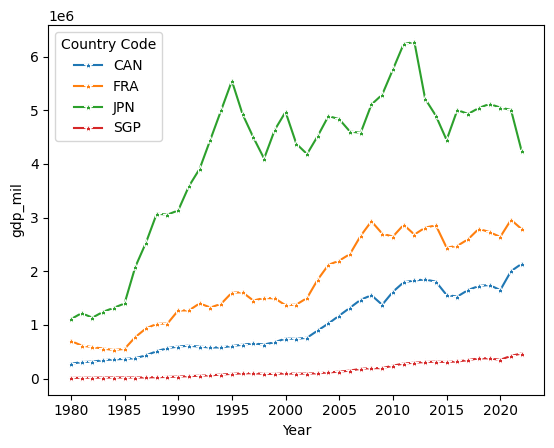

In [ ]:
import seaborn as sns
sns.lineplot(x = "Year", y = "gdp_mil", data = dataset_B, hue = "Country Code", marker = "*")